## About
This notebook generates Fig. SXXX, reporting on per-residue helicity predictions for all 32 sequences

## Dependencies
It requires `numpy`, `pandas`, `matplotlib`, and our sequence analysis package [sparrow](https://github.com/idptools/sparrow)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# can be installed from https://github.com/idptools/sparrow
from sparrow import Protein



In [3]:
def get_basal_fret(n):
    """
    Minifunction that takes in a sequence ID number and returns the basal mean EFRET

    Parameters
    -------------
    n : int
        Sequence ID

    Returns
    -------------
    float
        Returns the basal EFRET value for that sequence    
    """
    
    return DATA.loc[DATA['SequenceNumber'] == n, 'basal_mean'].iloc[0]

def get_NCPR(n):
    """
    Minifunction that takes in a sequence ID number and returns the NCPR for that sequence

    Parameters
    -------------
    n : int
        Sequence ID

    Returns
    -------------
    float
        Returns the NCPR for that sequence
    """
        
    return DATA.loc[DATA['SequenceNumber'] == n, 'NCPR'].iloc[0]


def get_disorder_prediction(n):
    """
    Minifunction that takes in a sequence ID number and returns the predicted per-residue disorder 
    using metapredict V2-FF.

    Parameters
    -------------
    n : int
        Sequence ID

    Returns
    -------------
    float
        Returns the basal EFRET value for that sequence    
    """
        
    x = Protein(DATA.loc[DATA['SequenceNumber'] == n, 'sequence'].iloc[0])
    return x.predictor.disorder()


In [4]:
# read in the full data CSV using pandas
DATA = pd.read_csv('../summary_GOOSE_mergedInfo.csv')

In [5]:
seq2basal = {}
for i in range(1,33):    
    seq2basal[i] = get_basal_fret(i)

seq2basal = dict(sorted(seq2basal.items(), key=lambda item: item[1], reverse=True))

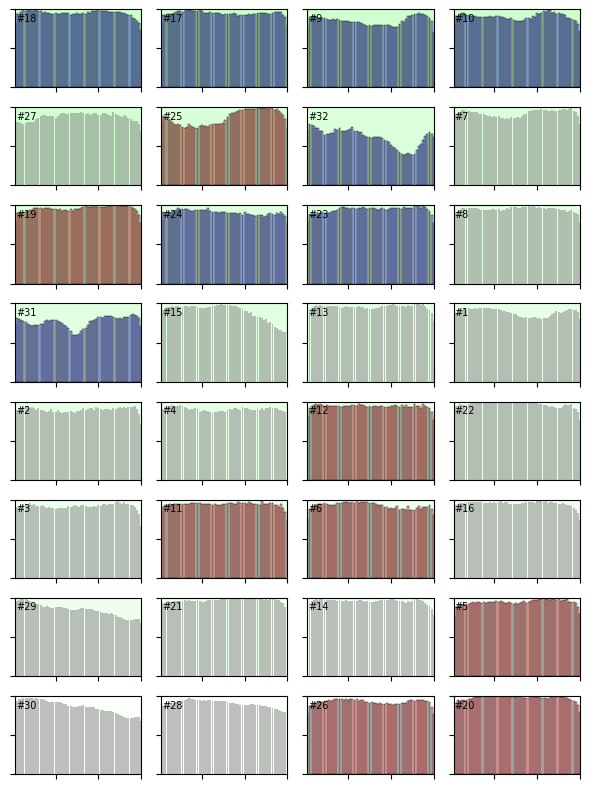

In [6]:

min_eFRET = min(list(seq2basal.values()))
max_eFRET = max(list(seq2basal.values()))



fig, axs = plt.subplots(8, 4, sharex=True, sharey=True, figsize=(6, 8))

global_idx = 0
residue_ix = np.arange(1,61)
for i in range(8):
    for j in range(4):

        idx = list(seq2basal.keys())[global_idx]

        helicity = get_disorder_prediction(idx)

        alpha = (seq2basal[idx]-min_eFRET)/(max_eFRET-min_eFRET)*0.2
        axs[i, j].set_facecolor((0, 1, 0, alpha))

        NCPR = get_NCPR(idx)
        if NCPR > 0:        
            axs[i, j].bar(residue_ix, helicity, width=0.9, color=(0,0,1,abs(NCPR)), edgecolor='k',lw=0.3)
        elif NCPR < 0:
            axs[i, j].bar(residue_ix, helicity, width=0.9, color=(1,0,0,abs(NCPR)), edgecolor='k',lw=0.3)
        else:
            axs[i, j].bar(residue_ix, helicity, width=0.9, color='grey', alpha=0.5)
        axs[i, j].text(1.5, 0.85, f"#{idx}", fontsize=7)

        axs[i, j].set_xlim([1,60])
        axs[i, j].set_ylim([0,1])        
        
        global_idx = global_idx + 1

        # Hide tick labels for subplots that are not on the left-most or bottom
        if j != 0:  # not left-most
            axs[i, j].set_yticklabels([])    
        if i != 3:  # not bottom
            axs[i, j].set_xticklabels([])

plt.tight_layout()
plt.savefig('disorder_prediction.pdf')